<a href="https://colab.research.google.com/github/lihiShlomit/DSproject/blob/main/trainModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git
import os
import sys
!ls /content/yolov5/utils/
import sys
sys.path.append('/content/yolov5')
import torch
from models.yolo import Model
from utils.dataloaders import create_dataloader
from utils.general import check_dataset
from utils.torch_utils import select_device
from utils.loss import ComputeLoss
from pathlib import Path
import os
from utils.general import non_max_suppression
from utils.metrics import bbox_iou
import numpy as np
from utils.metrics import ap_per_class
from torch.utils.data import DataLoader
from utils.dataloaders import LoadImagesAndLabels
from google.colab import drive
drive.mount('/content/drive')
DATA_YAML_PATH = "/content/drive/MyDrive/project/data/license_plates/archive/dataset.yaml"
data = check_dataset(DATA_YAML_PATH)
train_path = data['train']
val_path = data['val']
test_path = data['test']
nc = data['nc']

/content
fatal: destination path 'yolov5' already exists and is not an empty directory.
activations.py	  callbacks.py	  general.py	     metrics.py      triton.py
augmentations.py  dataloaders.py  google_app_engine  plots.py
autoanchor.py	  docker	  __init__.py	     __pycache__
autobatch.py	  downloads.py	  loggers	     segment
aws		  flask_rest_api  loss.py	     torch_utils.py
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# def yolo_collate_fn(batch):
#     imgs, targets, paths, shapes = zip(*batch)
#     imgs = torch.stack(imgs, dim=0)


#     for i, t in enumerate(targets):
#         t[:, 0] = i
#     targets = torch.cat(targets, dim=0)

#     return imgs, targets, paths, shapes
# hyp = {
#     'mosaic': 1.0,
#     'mixup': 0.1,
#     'lr0': 0.001,
#     'momentum': 0.9,
#     'weight_decay': 0.0005,
#     'warmup_epochs': 3.0,
#     'warmup_momentum': 0.8,
#     'warmup_bias_lr': 0.1,
#     'box': 0.05,
#     'cls': 0.5,
#     'obj': 1.0,
#     'anchor_t': 4.0,
#     'fl_gamma': 0.0,
#     'hsv_h': 0.015,
#     'hsv_s': 0.7,
#     'hsv_v': 0.4,
#     'degrees': 5.0,
#     'translate': 0.1,
#     'scale': 0.5,
#     'shear': 2.0,
#     'perspective': 0.001,
#     'flipud': 0.1,
#     'fliplr': 0.5,
#     'copy_paste': 0.0,
#     'cls_pw': 1.0,
#     'obj_pw': 1.0
# }

# cfg = '/content/yolov5/models/yolov5s.yaml'
# nc = 1
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model = Model(cfg, ch=3, nc=nc).to(device)

# imgsz = 416
# batch_size = 8

# epochs = 30
# train_dataset = LoadImagesAndLabels(train_path, imgsz, augment=True, hyp=hyp)
# val_dataset = LoadImagesAndLabels(val_path, imgsz, augment=False, hyp=hyp)
# test_dataset = LoadImagesAndLabels(test_path, imgsz, augment=False, hyp=hyp)

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
#                           num_workers=4, collate_fn=yolo_collate_fn)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
#                         num_workers=4, collate_fn=yolo_collate_fn)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
#                          num_workers=4, collate_fn=yolo_collate_fn)

# optimizer = torch.optim.Adam(model.parameters(), lr=hyp['lr0'],
#                              betas=(0.9, 0.999), weight_decay=hyp['weight_decay'])

# model.hyp = hyp
# compute_loss = ComputeLoss(model)

In [ ]:
#Class     Images  Instances          P          R      mAP50   mAP50-95
 # all        306        306      0.952      0.914      0.965      0.398

In [4]:
def yolo_collate_fn(batch):
    imgs, targets, paths, shapes = zip(*batch)
    imgs = torch.stack(imgs, dim=0)


    for i, t in enumerate(targets):
        t[:, 0] = i
    targets = torch.cat(targets, dim=0)

    return imgs, targets, paths, shapes
hyp = {
    'mosaic': 1.0,
    'mixup': 0.1,
    'lr0': 0.002,
    'momentum': 0.9,
    'weight_decay': 0.0005,
    'warmup_epochs': 3.0,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.1,
    'box': 0.05,
    'cls': 0.5,
    'obj': 1.0,
    'anchor_t': 4.0,
    'fl_gamma': 0.0,
    'hsv_h': 0.015,
    'hsv_s': 0.7,
    'hsv_v': 0.4,
    'degrees': 5.0,
    'translate': 0.1,
    'scale': 0.5,
    'shear': 2.0,
    'perspective': 0.001,
    'flipud': 0.1,
    'fliplr': 0.5,
    'copy_paste': 0.0,
    'cls_pw': 1.0,
    'obj_pw': 1.0
}

cfg = '/content/yolov5/models/yolov5s.yaml'
nc = 1
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = Model(cfg, ch=3, nc=nc).to(device)

imgsz = 416
batch_size = 8

epochs = 40
train_dataset = LoadImagesAndLabels(train_path, imgsz, augment=True, hyp=hyp)
val_dataset = LoadImagesAndLabels(val_path, imgsz, augment=False, hyp=hyp)
test_dataset = LoadImagesAndLabels(test_path, imgsz, augment=False, hyp=hyp)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=4, collate_fn=yolo_collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                        num_workers=4, collate_fn=yolo_collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                         num_workers=4, collate_fn=yolo_collate_fn)

optimizer = torch.optim.Adam(model.parameters(), lr=hyp['lr0'],
                             betas=(0.9, 0.999), weight_decay=hyp['weight_decay'])

model.hyp = hyp
compute_loss = ComputeLoss(model)

Overriding model.yaml nc=80 with nc=1

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]             

In [5]:
import gc
gc.collect()
torch.cuda.empty_cache()
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for imgs, targets, paths, _ in train_loader:
        imgs = imgs.to(device).float() / 255.0
        targets = targets.to(device)
        pred = model(imgs)
        loss, _ = compute_loss(pred, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        torch.cuda.empty_cache()

    avg_loss = total_loss / len(train_loader)
    print(f"\nEpoch {epoch+1}/{epochs} - Train Loss: {avg_loss:.4f}")

    # --- VALIDATION ---
    model.eval()
    val_loss_total = 0
    with torch.no_grad():
        for imgs, targets, paths, _ in val_loader:
            imgs = imgs.to(device).float() / 255.0
            targets = targets.to(device)

            pred = model(imgs)
            loss, _ = compute_loss(pred[1], targets)
            val_loss_total += loss.item()
            torch.cuda.empty_cache()

    avg_val_loss = val_loss_total / len(val_loader)
    print(f"Epoch {epoch+1}/{epochs} - Val Loss: {avg_val_loss:.4f}")

# torch.save(model.state_dict(), '/content/drive/MyDrive/project/model_16_30_002.pth')
ckpt = {
    'model': model,
    'epoch': 0,
    'version': '7.0',
}

# torch.save(ckpt, '/content/drive/MyDrive/project/model_16_30_002_yolov5.pt')

torch.save(ckpt, '/content/drive/MyDrive/project/model_8_40_002_yolov5.pt')


Epoch 1/40 - Train Loss: 1.0115
Epoch 1/40 - Val Loss: 0.7915

Epoch 2/40 - Train Loss: 0.8402
Epoch 2/40 - Val Loss: 0.6205

Epoch 3/40 - Train Loss: 0.7688
Epoch 3/40 - Val Loss: 0.6614

Epoch 4/40 - Train Loss: 0.7444
Epoch 4/40 - Val Loss: 0.5213

Epoch 5/40 - Train Loss: 0.7082
Epoch 5/40 - Val Loss: 0.6920

Epoch 6/40 - Train Loss: 0.6870
Epoch 6/40 - Val Loss: 0.6121

Epoch 7/40 - Train Loss: 0.6554
Epoch 7/40 - Val Loss: 0.4820

Epoch 8/40 - Train Loss: 0.6545
Epoch 8/40 - Val Loss: 0.5076

Epoch 9/40 - Train Loss: 0.6263
Epoch 9/40 - Val Loss: 0.5330

Epoch 10/40 - Train Loss: 0.6335
Epoch 10/40 - Val Loss: 0.4613

Epoch 11/40 - Train Loss: 0.6141
Epoch 11/40 - Val Loss: 0.5594

Epoch 12/40 - Train Loss: 0.6104
Epoch 12/40 - Val Loss: 0.4757

Epoch 13/40 - Train Loss: 0.5972
Epoch 13/40 - Val Loss: 0.4250

Epoch 14/40 - Train Loss: 0.5943
Epoch 14/40 - Val Loss: 0.4729

Epoch 15/40 - Train Loss: 0.5819
Epoch 15/40 - Val Loss: 0.5775

Epoch 16/40 - Train Loss: 0.5833
Epoch 16/

YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Overriding model.yaml nc=80 with nc=1

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  mod

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/yolov5


YOLOv5s summary: 214 layers, 7022326 parameters, 7022326 gradients, 15.9 GFLOPs



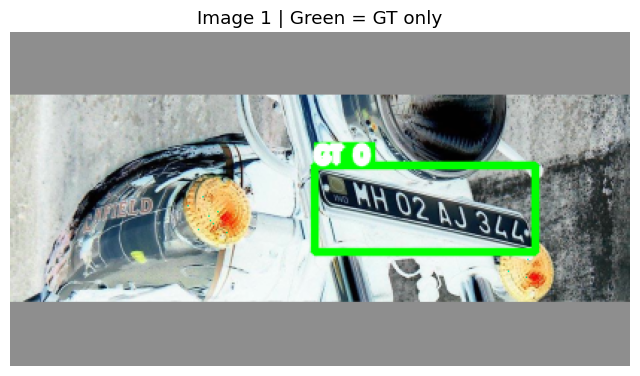

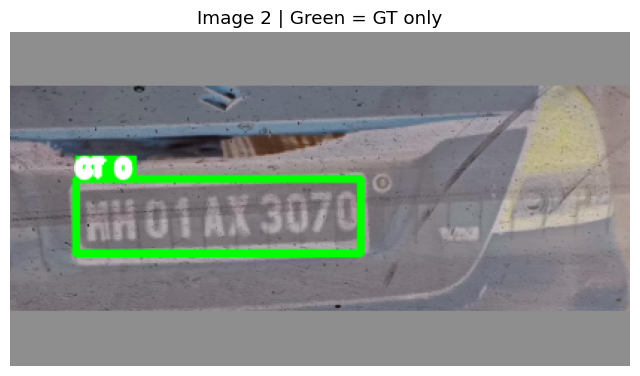

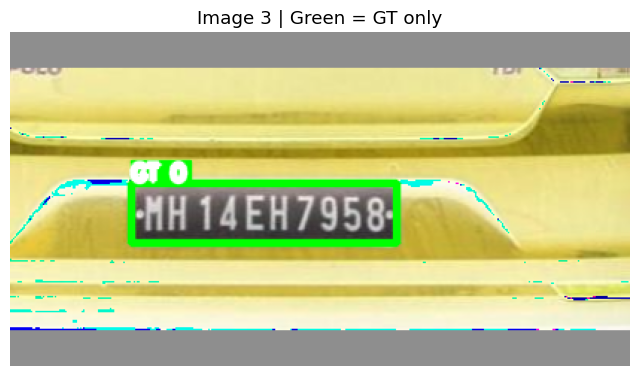

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/yolov5
import sys
sys.path.append('.')
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import torch
from pathlib import Path
from torch.utils.data import DataLoader

device = select_device('0' if torch.cuda.is_available() else 'cpu')
batch_size = 8
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=4, collate_fn=yolo_collate_fn)

# paint function
def plot_one_box(x, img, color=(128, 128, 128), label=None, line_thickness=4):
    tl = line_thickness or int(round(0.002 * max(img.shape[0:2])))
    x1, y1, x2, y2 = map(int, x)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)
        font_scale = 0.5
        t_size = cv2.getTextSize(label, 0, fontScale=font_scale, thickness=tf)[0]
        c2 = x1 + t_size[0], y1 - t_size[1] - 3
        cv2.rectangle(img, (x1, y1), c2, color, -1, cv2.LINE_AA)
        cv2.putText(img, label, (x1, y1 - 2), 0, font_scale, [255, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

# fit cords
def scale_coords(img1_shape, coords, img0_shape, ratio_pad=None):
    if ratio_pad is None:
        gain = min(img1_shape[0] / img0_shape[0], img1_shape[1] / img0_shape[1])
        pad = ((img1_shape[1] - img0_shape[1] * gain) / 2,
               (img1_shape[0] - img0_shape[0] * gain) / 2)
    else:
        gain = ratio_pad[0][0]
        pad = ratio_pad[1]
    coords[:, [0, 2]] -= pad[0]
    coords[:, [1, 3]] -= pad[1]
    coords[:, :4] /= gain
    coords[:, :4] = coords[:, :4].clamp(min=0)
    return coords

# run on 3 expamples
# 1. build model with same configuration
cfg_path = Path('models/yolov5s.yaml')
model = Model(cfg_path, ch=3, nc=1)  # ch = channels, nc = number of classes

# 2. get the model with weights
ckpt_path = '/content/drive/MyDrive/project/model_16_30_002.pth'
model.load_state_dict(torch.load(ckpt_path, map_location='cpu'))

#3. run model
model.eval()

4. #  paint boxes with Ground Truth (ירוק)
for i in range(3):
    img, labels, _, _ = val_dataset[i]
    img_tensor = img.unsqueeze(0).to(device).float()
    img_np = img.permute(1, 2, 0).cpu().numpy() * 255
    img_np = img_np.astype(np.uint8)
    img_np = np.ascontiguousarray(img_np)

    height, width = img_np.shape[:2]
    height, width = img_np.shape[:2]
    for box in labels:
        _, cls, x, y, w, h = box
        x1 = int((x - w / 2) * width)
        y1 = int((y - h / 2) * height)
        x2 = int((x + w / 2) * width)
        y2 = int((y + h / 2) * height)
        plot_one_box([x1, y1, x2, y2], img_np, label=f"GT {int(cls)}", color=(0, 255, 0), line_thickness=4)

    img_np_rgb = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(img_np_rgb)
    plt.axis('off')
    plt.title(f"Image {i+1} | Green = GT only")
    plt.show()


In [ ]:
from models.yolo import Model
import torch
from val import run
%cd yolov5
#new model vased yolo
model = Model('models/yolov5s.yaml', ch=3, nc=1)

#load weights from my model
# model.load_state_dict(torch.load('/content/drive/MyDrive/project/model_16_30_002.pth', map_location='cpu'))


model.nc = 1
model.names = ['license_plate']  # או רשימה מלאה של שמות המחלקות שלך

# #create new model for run
# ckpt = {
#     'model': model,
#     'epoch': 0,
#     'version': '7.0',
# }

# torch.save(ckpt, '/content/drive/MyDrive/project/model_16_30_002_yolov5.pt')

run(
    data='/content/drive/MyDrive/project/data/license_plates/archive/dataset.yaml',
    weights='/content/drive/MyDrive/project/model_16_30_002_yolov5.pt',
    imgsz=416,
    iou_thres=0.5,
    conf_thres=0.001,
    device='cpu'  # או '0' אם יש לך GPU
)

Overriding model.yaml nc=80 with nc=1

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]             

/content/yolov5


YOLOv5s summary: 214 layers, 7022326 parameters, 7022326 gradients, 15.9 GFLOPs

YOLOv5 🚀 v7.0-423-g567c6646 Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 16182 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/project/data/license_plates/archive/labels/val.cache... 306 images, 0 backgrounds, 0 corrupt: 100%|██████████| 306/306 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 10/10 [25:42<00:00, 154.26s/it]
                   all        306        306      0.952      0.914      0.965      0.398
Speed: 1.9ms pre-process, 4982.6ms inference, 0.8ms NMS per image at shape (32, 3, 416, 416)
Results saved to yolov5/runs/val/exp


((np.float64(0.9523506213836134),
  np.float64(0.9144227888018738),
  np.float64(0.9648986895669163),
  np.float64(0.3983040203563855),
  0.0,
  0.0,
  0.0),
 array([     0.3983]),
 (1.916322832793192, 4982.607396599514, 0.8424076379514208))

In [ ]:
!ls /content/drive/MyDrive/project/data.yaml


ls: cannot access '/content/drive/MyDrive/project/data.yaml': No such file or directory
